# To-do list

- OG dataset - [link](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database/notebooks)
- [ ] Loading data using Kaggle API
- [ ] Save model
- [ ] Save images for loss, accuracy , confusion matrix
- [ ] Data Augmentation
    - [x] Rotation
    - [x] Flip
    - [ ] more...? 
- [x] Data loading
- [x] Category Plot
- [ ] Models
    - [x] VGG-16
    - [ ] ResNet/Xception?
    - [ ] Model comparison
    - [ ] Validation
- [ ] Add validation generator
- [ ] gradcam? class activation maps 
- [ ] confusion matrix
- [ ] model evaluation
- [ ] TSNE? [link](https://www.kaggle.com/amritpal333/t-sne-and-pca-advanced-data-visualisation-done)
- [ ] Learning rate decay - [link](https://www.kaggle.com/amritpal333/t-sne-and-pca-advanced-data-visualisation-done)
- [ ] Terrific overall with attention maps and class maps - [link](https://www.kaggle.com/emrecetin/francois-cnn-model-on-covid-19-images)
- [ ] Covid-19 streamlit apps - [link](https://discuss.streamlit.io/t/data-apps-regarding-covid-19/2203)
- [ ] To-test - [link](https://www.kaggle.com/omarsalahhemied/diagnoise-covid-19-chest-x-ray-with-acc-approx-97)
- [ ] Prediction & Segmentation - [link](https://www.kaggle.com/prashant268/covid-19-diagnosis-using-x-ray-images) [link2](https://www.kaggle.com/ibrahimsobh/chest-x-ray-covid19-efnet-densenet-vgg-grad-cam)
- GRAD-CAM for our dataset [link](https://www.kaggle.com/amyjang/class-activation-mapping-for-covid-19-cnn)
- OG GRAD-CAM reference [link](https://keras.io/examples/vision/grad_cam/)
- Confusion matrix & xception 98% [link](https://www.kaggle.com/amitbiswas/detection-of-covid-19-using-chest-x-ray)
- Confusion matrix code - [link](https://www.kaggle.com/swarajp/covid-19-detection-using-x-rays)


- [ ] Data resource - [Kaggle](https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons/data?)
- [ ] Plotly notebook - [Kernel](https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons/data#Dataset)

# Resources used
- [Building powerful image classification models using very little data by Francois Chollet (Author of Keras)](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
- [Image Classification | Tensorflow](https://www.tensorflow.org/tutorials/images/classification)
- [Machine Learning Mastery - VGG16](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/)
- [VGG 16 Explained](https://qr.ae/pNCJDU)

# Loading Libraries

In [ ]:
!pip install colabcode
from colabcode import ColabCode

  Created wheel for pyngrok: filename=pyngrok-4.1.12-cp36-none-any.whl size=16810 sha256=0c950acced0a5281a7323b61e091307dd88d785fe3dadeb68cd868799f54860c
  Stored in directory: /root/.cache/pip/wheels/69/c3/d6/6968dd4d831794d41c311be1d7af6f4ac151c5d3bd0e6efab8
Successfully built pyngrok


In [ ]:
# ColabCode(port=10000)

In [ ]:
#connect Colab to GCS using Google Auth API and gsutil
def colab_gcp():
  #connect Colab to GCS using Google Auth API and gsutil
  from google.colab import auth
  auth.authenticate_user()
  project_id = 'appliedai-2020'
  !gcloud config set project {project_id}
  !gsutil ls

  # Mounting GCS data bucket
  !echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
  !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
  !apt -qq update  &> /dev/null
  !apt -qq install gcsfuse  &> /dev/null

  bucket_name = 'dracarys3_bucket'
  !mkdir /content/bucket
  !gcsfuse $bucket_name /content/bucket

colab_gcp()

In [ ]:
!nvidia-smi

Mon Sep 14 15:04:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from pandas import plotting
from tqdm import tqdm_notebook

# for visualizations
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import tensorflow as tf
print("Using Tensorflow version: {}".format(tf.__version__))

Using Tensorflow version: 2.3.0


# Loading data

In [ ]:
!cp -r /content/bucket/covid/* /content/

### Downloading dataset from Kaggle

In [ ]:
#upload kaggle.json
# download from https://www.kaggle.com/{USERNAME}/account

from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
!make requirements

python3 -m pip install pip setuptools wheel --progress-bar off
python3 -m pip install -r requirements.txt


In [ ]:
!make -s data
!make model_download

In [ ]:
covid_excel = pd.read_excel('data/0_raw/COVID-19 Radiography Database/COVID-19.metadata.xlsx')
normal_excel = pd.read_excel('data/0_raw/COVID-19 Radiography Database/NORMAL.metadata.xlsx')
pneumonia_excel = pd.read_excel('data/0_raw/COVID-19 Radiography Database/Viral Pneumonia.matadata.xlsx')

In [ ]:
covid_path = '/content/covid/COVID-19 Radiography Database/COVID-19/'+covid_excel['FILE NAME']+'.'+covid_excel["FORMAT"]
normal_path = '/content/covid/COVID-19 Radiography Database/COVID-19/'+normal_excel['FILE NAME']+'.'+normal_excel["FORMAT"]
pneumonia_path = '/content/covid/COVID-19 Radiography Database/COVID-19/'+pneumonia_excel['FILE NAME']+'.'+pneumonia_excel["FORMAT"]

In [ ]:
covid_df = pd.DataFrame({'path':covid_path,'label':'COVID19'})
normal_df = pd.DataFrame({'path':normal_path,'label':'NORMAL'})
pneumonia_df = pd.DataFrame({'path':pneumonia_path,'label':'PNEUMONIA'})

In [ ]:
data = covid_df.append(normal_df,ignore_index=True,verify_integrity=True).append(pneumonia_df,ignore_index=True,verify_integrity=True)
data.head()

,path,label
0,/content/covid/COVID-19 Radiography Database/C...,COVID19
1,/content/covid/COVID-19 Radiography Database/C...,COVID19
2,/content/covid/COVID-19 Radiography Database/C...,COVID19
3,/content/covid/COVID-19 Radiography Database/C...,COVID19
4,/content/covid/COVID-19 Radiography Database/C...,COVID19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2905 non-null   object
 1   label   2905 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [ ]:
data.describe()

,path,label
count,2905,2905
unique,2905,3
top,/content/covid/COVID-19 Radiography Database/C...,PNEUMONIA
freq,1,1345


In [ ]:
X = data['path']
y = data.drop('path', axis = 1)

In [ ]:
data['label'].value_counts()

PNEUMONIA    1345
NORMAL       1341
COVID19       219
Name: label, dtype: int64

In [ ]:
data

,path,label
0,/content/covid/COVID-19 Radiography Database/C...,COVID19
1,/content/covid/COVID-19 Radiography Database/C...,COVID19
2,/content/covid/COVID-19 Radiography Database/C...,COVID19
3,/content/covid/COVID-19 Radiography Database/C...,COVID19
4,/content/covid/COVID-19 Radiography Database/C...,COVID19
...,...,...
2900,/content/covid/COVID-19 Radiography Database/C...,PNEUMONIA
2901,/content/covid/COVID-19 Radiography Database/C...,PNEUMONIA
2902,/content/covid/COVID-19 Radiography Database/C...,PNEUMONIA
2903,/content/covid/COVID-19 Radiography Database/C...,PNEUMONIA


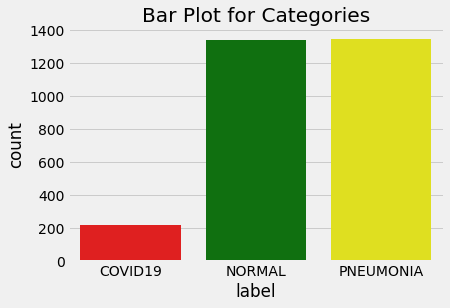

In [ ]:
sns.countplot(x='label',data=data,palette={'PNEUMONIA':'yellow','NORMAL':'green','COVID19':'red'})\
              .set_title('Bar Plot for Categories');

## Another way of loading data(Memory inefficient way)

In [ ]:
imagePaths = []
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [ ]:
# Verifying length
len(imagePaths) == 2905

True

In [ ]:
X = []
y = []
resize = 224

for image_path in tqdm_notebook(imagePaths):
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) / 255

    X.append(image)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Analysis

In [ ]:
from PIL import Image

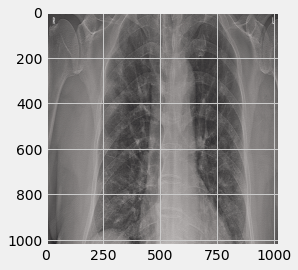

In [ ]:
image = cv2.imread('/content/covid/COVID-19 Radiography Database/COVID-19/COVID-19 (1).png')
plt.imshow(image);

In [ ]:
print(image.shape)

(1024, 1024, 3)


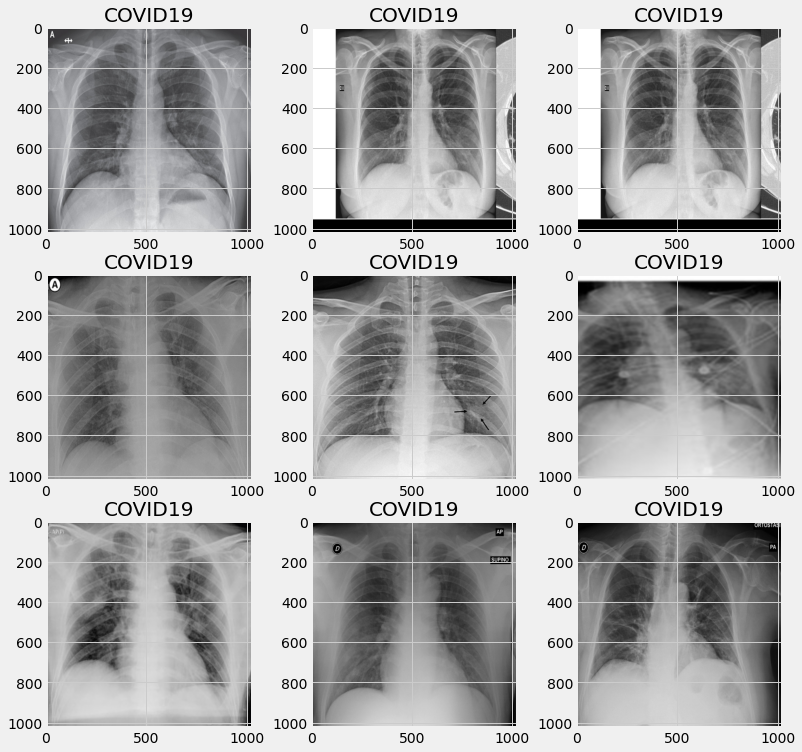

In [ ]:
COVID19images = os.listdir("/content/covid/COVID-19 Radiography Database/COVID-19")

plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join("/content/covid/COVID-19 Radiography Database/COVID-19",COVID19images[i])),cmap='gray')
    plt.title("COVID19")
plt.show()

In [ ]:
# # Plotting Normal VS Covid in Grid

# sns.set_context('talk')
# plt.figure(figsize=(25,12))
# plt.subplots_adjust(hspace=0.3)

# plt.subplot(2, 2, 1)
# plt.imshow(mpimg.imread(train_df[train_df['Class'] == 'Normal']['Path'].values[0]))
# plt.title('Normal')

# plt.subplot(2, 2, 2)
# plt.imshow(mpimg.imread(train_df[train_df['Class'] == 'Normal']['Path'].values[6]))
# plt.title('Normal')

# plt.subplot(2, 2, 3)
# plt.imshow(mpimg.imread(train_df[train_df['Class'] == 'Covid']['Path'].values[28]))
# plt.title('COVID-19')

# plt.subplot(2, 2, 4)
# plt.imshow(mpimg.imread(train_df[train_df['Class'] == 'Covid']['Path'].values[26]))
# plt.title('COVID-19')

In [ ]:
df['Labels'].value_counts()

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [ ]:
labels = df['Labels'].value_counts().keys()

In [ ]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
y_encoded = np_utils.to_categorical(encoded_labels)

In [ ]:
encoder.classes_

In [ ]:
encoder.transform(encoder.classes_)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_cvtest, y_train, y_cvtest = train_test_split(X, y_encoded, test_size=0.40, stratify=y_encoded, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_cvtest, y_cvtest, test_size=0.50, stratify=y_cvtest, random_state=42)

print("{} \tRows and {} \tColumns in X_train".format(X_train.shape[0],X_train.shape[1]))
print("{} \tRows and {} \tColumns in X_test".format(X_test.shape[0],X_test.shape[1]))
print("{} \tRows and {} \tColumns in X_cv".format(X_cv.shape[0],X_cv.shape[1]))

print("{} \tRows and {} \tColumns in y_train".format(y_train.shape[0],y_train.shape[1]))
print("{} \tRows and {} \tColumns in y_test".format(y_test.shape[0],y_test.shape[1]))
print("{} \tRows and {} \tColumns in y_cv".format(X_test.shape[0],y_cv.shape[1]))

In [ ]:
del X
del y_encoded
del encoded_labels

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from keras.utils import np_utils

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, InputLayer

In [ ]:
BATCH_SIZE = 64
TRAIN_LENGTH = len(X_train)
VAL_LENGTH = len(X_cv)
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
SPE_VAL = VAL_LENGTH // BATCH_SIZE
IMG_SIZE = 224
LR = 0.0001
EPOCHS = 50

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=15,
        fill_mode="nearest")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

!mkdir /content/augmentation_samples

img = cv2.imread(imagePaths[0])
x = img_to_array(img)  # this is a Numpy array with shape (3, 1024, 1024)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 1024, 1024)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/augmentation_samples', save_prefix='ct', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
def custom_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))

    return model

In [ ]:
def VGG16_model():
    base = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    
    output = base.layers[-1].output
    output = Flatten()(output)
    
    model = Model(base.input, outputs=output)
    
    for layer in model.layers:
        layer.trainable = False
    
    return model

In [ ]:
model = Sequential()
model.add(VGG16_model())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
optimizer = Adam(lr = LR, decay = LR/EPOCHS)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_accuracy', min_delta = 0.002, patience = 5 ,mode = 'auto', verbose = 1)

ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'
checkpointer = ModelCheckpoint(filepath = '/content/model-{epoch:03d}.h5', 
                               monitor = 'val_accuracy', verbose = 1, save_best_only = False, mode ='auto')

callbacks_list = [earlystop, checkpointer]

history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                                    steps_per_epoch=STEPS_PER_EPOCH,
                                    validation_data=(X_cv, y_cv),
                                    validation_steps=SPE_VAL,
                                    epochs=EPOCHS,
                                    verbose=1, callbacks = callbacks_list)

In [ ]:
# !mkdir -p /content/output/models
# print("Saving Model as model.h5 in /output/models directory")
# model.save('/content/output/models/base_model_covid.h5')

In [ ]:
encoder.classes_

array(['COVID-19', 'NORMAL', 'Viral Pneumonia'], dtype='<U15')

In [ ]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(s_img)
    plt.title(labels[np.argmax(sample_label[i])] + " pred as: " + labels[top_index], fontsize=8)

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="top right")
plt.show()

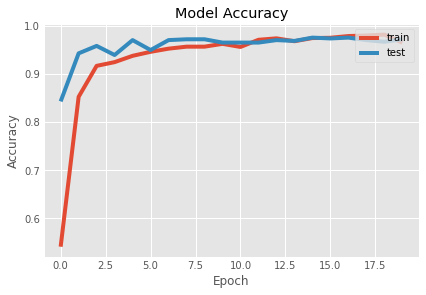

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

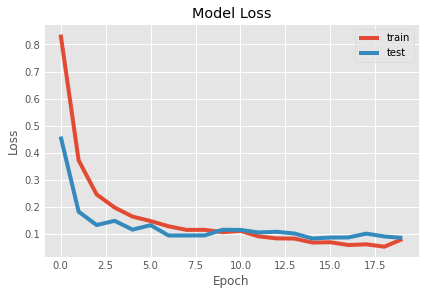

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
#Test Accuracy
score=model.evaluate(X_test,y_test,verbose=0)
print("The test accuracy for the model is %f "%(score[1]*100))

In [ ]:
class_dict = {0:'COVID19',
              1:'NORMAL',
              2:'PNEUMONIA'}

prediction:  NORMAL


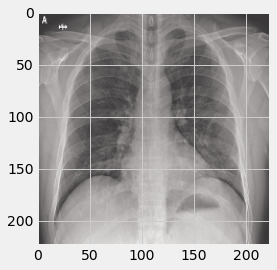

In [ ]:
file_path =  '/content/covid/COVID-19 Radiography Database/COVID-19/COVID-19 (18).png'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

In [ ]:
probs

array([[0.0000000e+00, 4.9533384e-05, 0.0000000e+00]], dtype=float32)

In [ ]:
#Plotting Confusion Matrix
x=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
Cm_df=pd.DataFrame(x,index=encoder.classes_,columns=encoder.classes_)

sns.set(font_scale=1.5,color_codes=True,palette='deep')
sns.heatmap(Cm_df,annot=True,annot_kws={'size':16},fmt='d',cmap='YlGnBu')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix')

# Deployment Streamlit

In [ ]:
!pip install pyngrok streamlit

In [ ]:
%cd /content/
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
!tar xvf ngrok-stable-linux-amd64.tgz

/content
--2020-09-14 19:10:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 52.73.16.193, 34.205.238.171, 54.84.72.55, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.73.16.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13723482 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.09M  13.9MB/s    in 0.9s    

2020-09-14 19:10:11 (13.9 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13723482/13723482]

ngrok


In [ ]:
from pyngrok import ngrok
# Open a HTTP tunnel on the default port 80
public_url = ngrok.connect(port = '8501')
print(public_url)

http://b5f0079e66ab.ngrok.io


In [ ]:
%cd /content/
print("Use this link to view Streamlit app demo\n")
get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
 
print("\n\nDon't use the links provided below")

!streamlit run app.py

/content
Use this link to view Streamlit app demo

http://b5f0079e66ab.ngrok.io


Don't use the links provided below
2020-09-14 20:45:29.264000: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.145.142:8501

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
2020-09-14 20:46:59.483413: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-14 20:46:59.569150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-14 20:46